# Import Important Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob as gb
import cv2
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


# EDA

In [ ]:
encodTarget = {'notumor':0, 'pituitary':1, 'meningioma':2, 'glioma':3 }

def getcode(n) :
    for x , y in encodTarget.items() :
        if n == y :
            return x

In [ ]:
data = '/kaggle/input/brain-tumor-mri-dataset'
dataTrain = "/kaggle/input/brain-tumor-mri-dataset/Training"
dataTest = "/kaggle/input/brain-tumor-mri-dataset/Testing"

s = 168
img_dim = (168,168)

X_train = []
y_train = []
print("For training data there are:")

for folder in  os.listdir(dataTrain) :
    files = gb.glob(pathname= str(dataTrain + '//' + folder + '/*.jpg'))
    print(f'There is {len(files)} image for training data in folder {folder}')
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(encodTarget[folder])

X_test = []
y_test = []
print("\nFor testing data there are:")
for folder in  os.listdir(dataTest) :
    files = gb.glob(pathname= str(dataTest + '//'+ folder + '/*.jpg'))
    print(f'There is {len(files)} image for testing data in folder {folder}')
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(encodTarget[folder])



For training data there are:
There is 1457 image for training data in folder pituitary
There is 1595 image for training data in folder notumor
There is 1339 image for training data in folder meningioma
There is 1321 image for training data in folder glioma

For testing data there are:
There is 300 image for testing data in folder pituitary
There is 405 image for testing data in folder notumor
There is 306 image for testing data in folder meningioma
There is 300 image for testing data in folder glioma


In [ ]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
X_test = np.array(X_test)
y_test = np.array(y_test)

n_train = X_train.shape[0]
n_valid = X_valid.shape[0]
n_test = X_test.shape[0]

X_train_reshape = np.reshape(X_train, (n_train, s*s*3))
X_valid_reshape = np.reshape(X_valid, (n_valid, s*s*3))
X_test_reshape = np.reshape(X_test, (n_test, s*s*3))

print(f'There is {len(X_train)} items in X_train')
print(f'There is {len(X_valid)} items in X_valid')
print(f'There is {len(X_test)} items in X_test')
print(f'There is {len(y_train)} items in y_train')
print(f'There is {len(y_valid)} items in y_valid')
print(f'There is {len(y_test)} items in y_test')

There is 5712 items in X_train
There is 1048 items in X_valid
There is 263 items in X_test
There is 5712 items in y_train
There is 1048 items in y_valid
There is 263 items in y_test


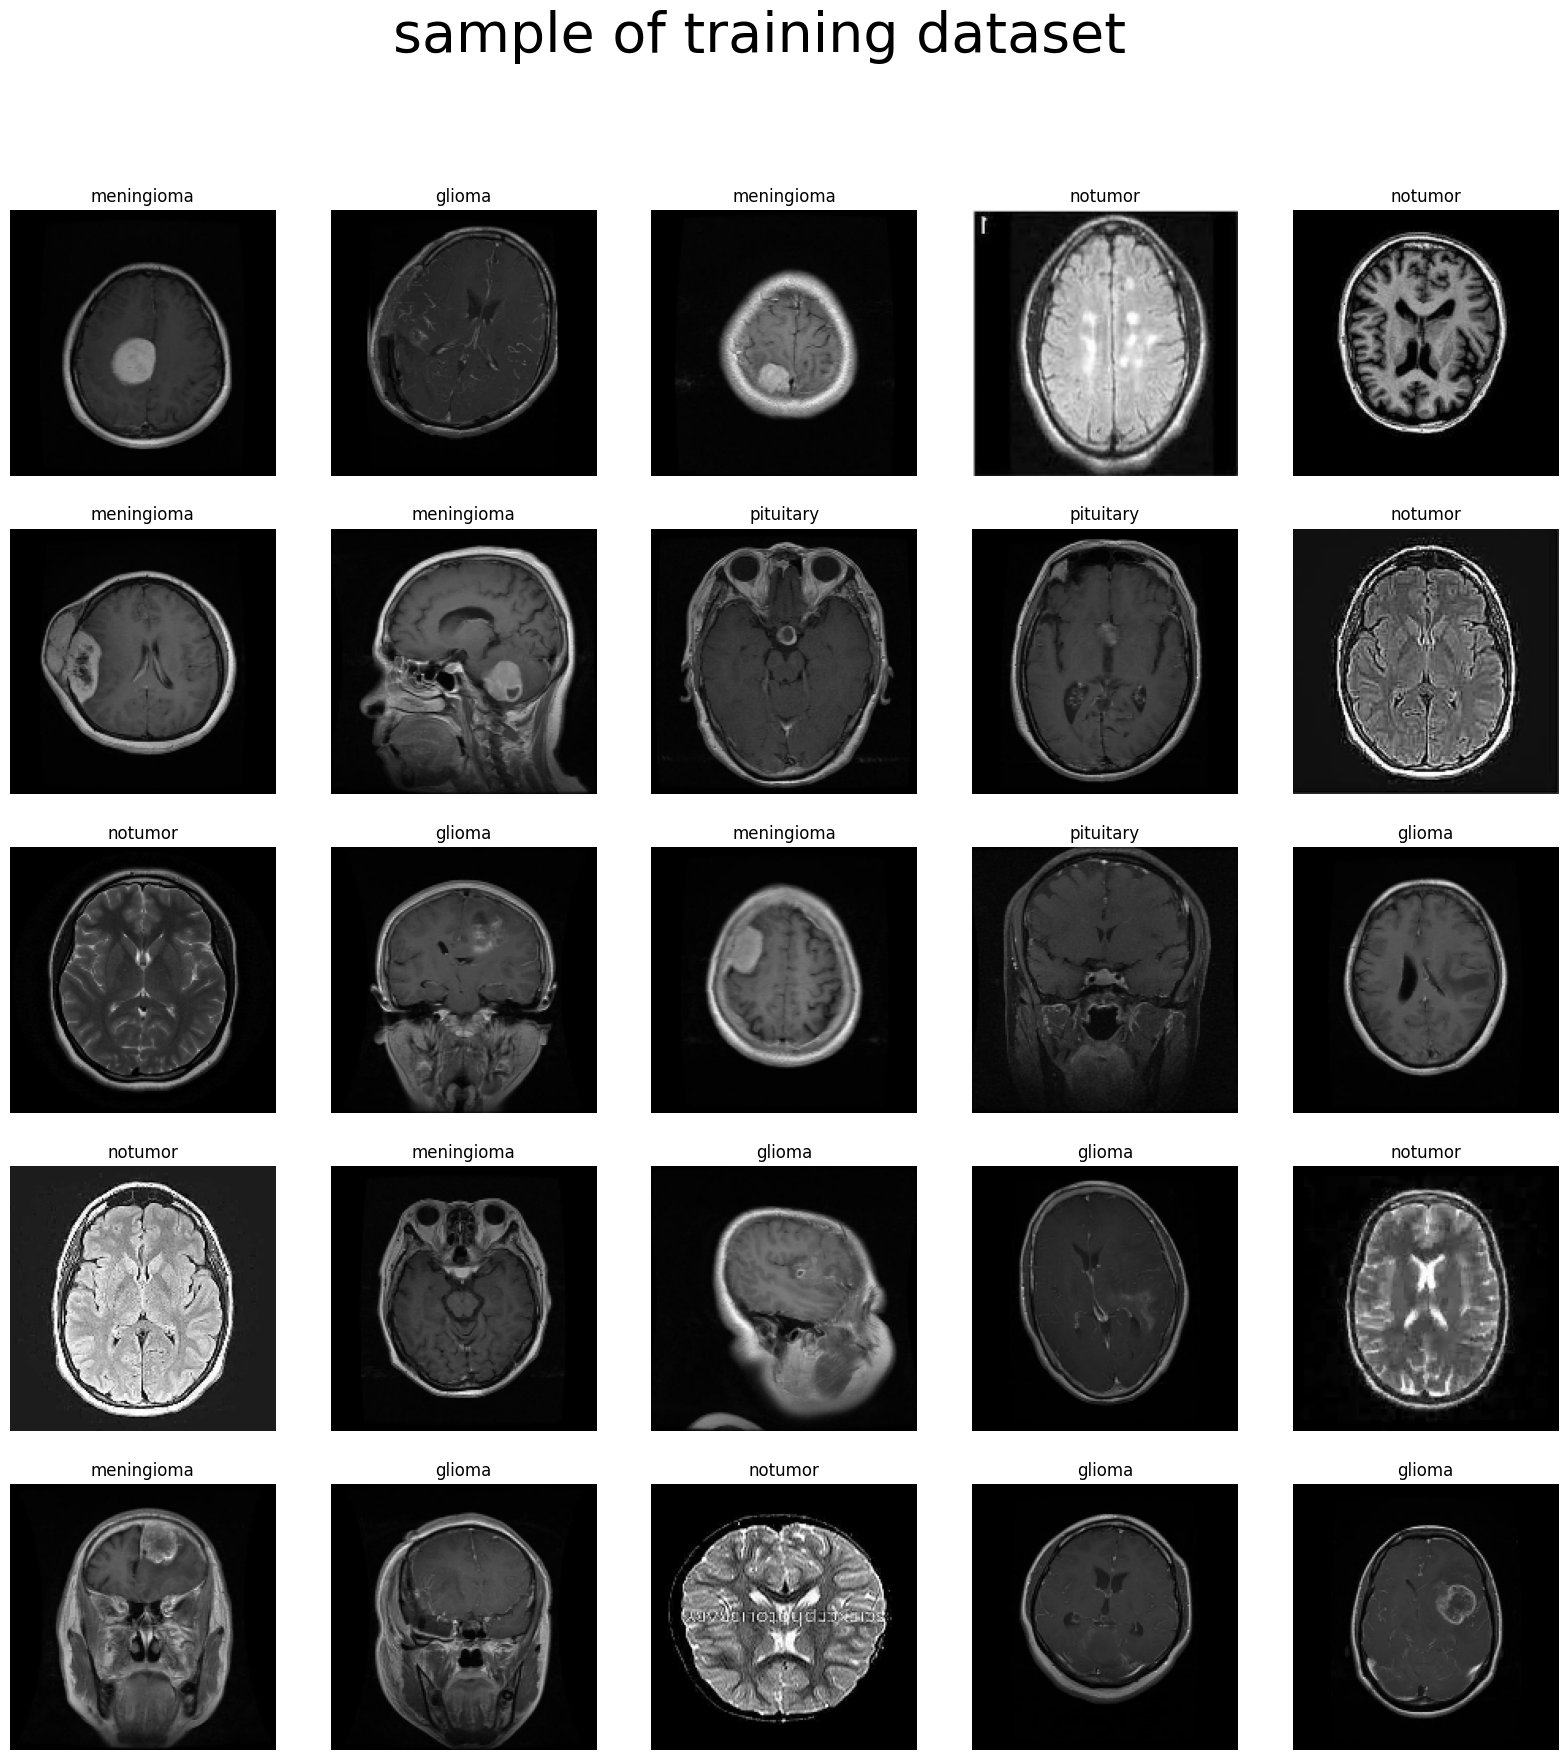

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),25))) :
    plt.subplot(5,5,n+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))
    plt.suptitle('sample of training dataset',fontsize = 40)

# Create Models

## 1- Artifitial Neural Network

In [ ]:
tf.random.set_seed(1234)
Model_ANN = keras.models.Sequential(
    [
        tf.keras.Input(shape=(168 * 168 *3 ,)),
        keras.layers.Dense(512,activation="relu",name = "layer1"),
        keras.layers.Dense(4,activation="softmax",name ="layer2"),
    ], name = "Model_ANN"
)

In [ ]:
[layer1, layer2] = Model_ANN.layers

In [ ]:
Model_ANN.summary()

Model: "Model_ANN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 512)            │    43,352,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,354,628 (165.38 MB)

 Trainable params: 43,354,628 (165.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()

layer1.set_weights((W1,b1))
layer2.set_weights((W2,b2))

print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")


W1 shape = (84672, 512), b1 shape = (512,)
W2 shape = (512, 4), b2 shape = (4,)


In [ ]:
Model_ANN.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

history = Model_ANN.fit(
    X_train_reshape,y_train,
    epochs=20,
    batch_size=120
)

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 404ms/step - accuracy: 0.3535 - loss: 872.0967
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 389ms/step - accuracy: 0.6397 - loss: 8.6058
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 386ms/step - accuracy: 0.7118 - loss: 5.4350
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 377ms/step - accuracy: 0.7304 - loss: 5.0362
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 21s 388ms/step - accuracy: 0.7145 - loss: 6.9648
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 427ms/step - accuracy: 0.7023 - loss: 9.0217
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 41s 422ms/step - accuracy: 0.7630 - loss: 4.4938
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 23s 476ms/step - accuracy: 0.7985 - loss: 3.4582
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 43s 519ms/step - accuracy: 0.8039 - loss: 3.1567
Epoch 10/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 40s 490ms/step - accuracy: 0.7982 - loss: 3.6535
Epoch 11/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 38s 418ms/step - accuracy: 0.7584 - loss: 5.5613
Epoch 12/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
ModelLoss, ModelAccuracy = Model_ANN.evaluate(X_valid_reshape, y_valid)

y_pred = Model_ANN.predict(X_valid_reshape)

y_pred_classes = np.argmax(y_pred, axis=1)

f1 = f1_score(y_valid, y_pred_classes, average='weighted')

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy))
print('F1 Score is {}'.format(f1))

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.7388 - loss: 11.9893
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step
Test Loss is 12.459752082824707
Test Accuracy is 0.7337786555290222
F1 Score is 0.6706726942112078


## 2- Dense Neural Network

In [ ]:
tf.random.set_seed(1234)
Model_DNN = keras.models.Sequential(
    [
        tf.keras.Input(shape=(168 * 168 *3 ,)),
        keras.layers.Dense(128,activation="relu",name = "layer1"),
        keras.layers.Dense(32,activation="relu",name ="layer2"),
        keras.layers.Dense(32,activation="relu",name ="layer3"),
        keras.layers.Dense(128,activation="relu",name ="layer4"),
        keras.layers.Dense(4,activation="linear",name ="layer5"),
    ], name = "Model_DNN"
)

In [ ]:
[layer1, layer2, layer3, layer4, layer5] = Model_DNN.layers

In [ ]:
Model_DNN.summary()

Model: "Model_DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 128)            │    10,838,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer4 (Dense)                  │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer5 (Dense)                  │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,848,068 (41.38 MB)

 Trainable params: 10,848,068 (41.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
W4,b4 = layer4.get_weights()
W5,b5 = layer5.get_weights()

layer1.set_weights((W1,b1))
layer2.set_weights((W2,b2))
layer3.set_weights((W3,b3))
layer4.set_weights((W4,b4))
layer5.set_weights((W5,b5))

print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")
print(f"W4 shape = {W4.shape}, b3 shape = {b4.shape}")
print(f"W3 shape = {W5.shape}, b3 shape = {b5.shape}")

W1 shape = (84672, 128), b1 shape = (128,)
W2 shape = (128, 32), b2 shape = (32,)
W3 shape = (32, 32), b3 shape = (32,)
W4 shape = (32, 128), b3 shape = (128,)
W3 shape = (128, 4), b3 shape = (4,)


In [ ]:
Model_DNN.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

history = Model_DNN.fit(
    X_train_reshape,y_train,
    epochs=20,
    batch_size=120
)

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.3629 - loss: 21.4703
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.6020 - loss: 4.3823
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - accuracy: 0.7011 - loss: 2.2593
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.6911 - loss: 2.4387
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.7802 - loss: 1.2342
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.7642 - loss: 1.4374
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.8173 - loss: 0.9184
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.7971 - loss: 0.9878
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - accuracy: 0.8078 - loss: 0.9381
Epoch 10/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.7682 - loss: 1.5276
Epoch 11/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.8350 - loss: 0.7534
Epoch 12/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 11

In [ ]:
ModelLoss, ModelAccuracy = Model_DNN.evaluate(X_valid_reshape, y_valid)

y_pred = Model_DNN.predict(X_valid_reshape)

y_pred_classes = np.argmax(y_pred, axis=1)

f1 = f1_score(y_valid, y_pred_classes, average='weighted')

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy))
print('F1 Score is {}'.format(f1))

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8390 - loss: 0.8737
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Test Loss is 0.931541383266449
Test Accuracy is 0.8330152630805969
F1 Score is 0.8220276248003426


# Convolution Neural Network

## 3.1- Convolution Neural Network

In [ ]:
image_shape = (img_dim[0], img_dim[1], 3)

Model_CNN1 = keras.models.Sequential([
    keras.layers.Input(shape=image_shape),

    keras.layers.Conv2D(128, (3, 3), activation = 'relu' , name= "layer1"),
    keras.layers.MaxPooling2D((2,2), name= "layer2"),

    keras.layers.Conv2D(64, (3, 3), activation = 'relu', name= "layer3"),
    keras.layers.MaxPooling2D((2,2), name= "layer4"),

    keras.layers.Flatten(name= "layer5"),

    keras.layers.Dense(128, activation=tf.nn.relu, name= "layer6"),
    keras.layers.Dense(4, activation=tf.nn.softmax, name= "layer7")
])


In [ ]:
[layer1, layer2, layer3, layer4, layer5, layer6, layer7] = Model_CNN1.layers

In [ ]:
Model_CNN1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Conv2D)                 │ (None, 166, 166, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (MaxPooling2D)           │ (None, 83, 83, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Conv2D)                 │ (None, 81, 81, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer4 (MaxPooling2D)           │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer5 (Flatten)                │ (None, 102400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer6 (Dense)                  │ (None, 128)            │    13,107,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer7 (Dense)                  │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,185,220 (50.30 MB)

 Trainable params: 13,185,220 (50.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Model_CNN1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = Model_CNN1.fit(
    X_train,y_train,
    epochs=5,
    batch_size=120
)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 419s 9s/step - accuracy: 0.6524 - loss: 1.4478
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 415s 9s/step - accuracy: 0.9302 - loss: 0.2139
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 413s 9s/step - accuracy: 0.9777 - loss: 0.0725
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 415s 9s/step - accuracy: 0.9903 - loss: 0.0359
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 414s 9s/step - accuracy: 0.9938 - loss: 0.0239
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 413s 9s/step - accuracy: 0.9953 - loss: 0.0206
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 413s 9s/step - accuracy: 0.9968 - loss: 0.0109
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 412s 9s/step - accuracy: 0.9972 - loss: 0.0114
Epoch 9/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 411s 9s/step - accuracy: 0.9931 - loss: 0.0215
Epoch 10/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 410s 9s/step - accuracy: 0.9935 - loss: 0.0182


In [ ]:
ModelLoss, ModelAccuracy = Model_CNN1.evaluate(X_valid, y_valid)

y_pred = Model_CNN1.predict(X_valid)

y_pred_classes = np.argmax(y_pred, axis=1)

f1 = f1_score(y_valid, y_pred_classes, average='weighted')

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy))
print('F1 Score is {}'.format(f1))

33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 675ms/step - accuracy: 0.9502 - loss: 0.1859
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 663ms/step
Test Loss is 0.18585577607154846
Test Accuracy is 0.9522900581359863
F1 Score is 0.9524601021595298


## 3.2- Convolution Neurak Network

In [ ]:
image_shape = (img_dim[0], img_dim[1], 3)

Model_CNN2 = keras.models.Sequential([
    keras.layers.Input(shape=image_shape),

    keras.layers.Conv2D(128, (3, 3), activation = 'relu' , name= "layer1"),
    keras.layers.MaxPooling2D((2,2), name= "layer2"),

    keras.layers.Conv2D(64, (3, 3), activation = 'relu', name= "layer3"),
    keras.layers.MaxPooling2D((2,2), name= "layer4"),

    keras.layers.Conv2D(64, (3, 3), activation = 'relu', name= "layer5"),
    keras.layers.MaxPooling2D((2,2), name= "layer6"),

    keras.layers.Conv2D(128, (3, 3), activation = 'relu', name= "layer7"),
    keras.layers.MaxPooling2D((2,2), name= "layer8"),

    keras.layers.Flatten(name= "layer9"),

    keras.layers.Dense(128, activation=tf.nn.relu, name= "layer10"),
    keras.layers.Dropout(rate=0.5, name= "layer11") ,
    keras.layers.Dense(4, activation=tf.nn.softmax, name= "layer12")
])


In [ ]:
Model_CNN2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
[layer1, layer2, layer3, layer4, layer5, layer6, layer7 ,layer8, layer9, layer10, layer11, layer12] = Model_CNN2.layers

In [ ]:
Model_CNN2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Conv2D)                 │ (None, 166, 166, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (MaxPooling2D)           │ (None, 83, 83, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Conv2D)                 │ (None, 81, 81, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer4 (MaxPooling2D)           │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer5 (Conv2D)                 │ (None, 38, 38, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer6 (MaxPooling2D)           │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer7 (Conv2D)                 │ (None, 17, 17, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer8 (MaxPooling2D)           │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer9 (Flatten)                │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer10 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer11 (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer12 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,237,380 (4.72 MB)

 Trainable params: 1,237,380 (4.72 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = Model_CNN2.fit(
    X_train,y_train,
    epochs=20,
    batch_size=120
)

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 349s 7s/step - accuracy: 0.3794 - loss: 7.2183
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 352s 7s/step - accuracy: 0.6436 - loss: 0.8525
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 339s 7s/step - accuracy: 0.7179 - loss: 0.6765
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 317s 7s/step - accuracy: 0.7601 - loss: 0.5790
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 344s 7s/step - accuracy: 0.7768 - loss: 0.5363
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 359s 7s/step - accuracy: 0.8048 - loss: 0.4701
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 311s 6s/step - accuracy: 0.8522 - loss: 0.3802
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 315s 6s/step - accuracy: 0.8717 - loss: 0.3351
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 331s 7s/step - accuracy: 0.8814 - loss: 0.3094
Epoch 10/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 354s 6s/step - accuracy: 0.8891 - loss: 0.2898
Epoch 11/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 320s 7s/step - accuracy: 0.9046 - loss: 0.2386
Epoch 12/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 299s 6s/step - accuracy:

In [ ]:
ModelLoss, ModelAccuracy = Model_CNN2.evaluate(X_valid, y_valid)

y_pred = Model_CNN2.predict(X_valid)

y_pred_classes = np.argmax(y_pred, axis=1)

f1 = f1_score(y_valid, y_pred_classes, average='weighted')

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy))
print('F1 Score is {}'.format(f1))

33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 469ms/step - accuracy: 0.9453 - loss: 0.2571
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 464ms/step
Test Loss is 0.2344631552696228
Test Accuracy is 0.9417939186096191
F1 Score is 0.9409549069609636


# Conclusion
### The Best Model For This data Is:
### 3.1- Convolution Neurak Network

# Test The Best Model (CNN_1)

In [ ]:
ModelLoss, ModelAccuracy = Model_CNN1.evaluate(X_test, y_test)

y_pred = Model_CNN1.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

f1 = f1_score(y_test, y_pred_classes, average='weighted')

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy))
print('F1 Score is {}'.format(f1))

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 609ms/step - accuracy: 0.9311 - loss: 0.4580
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 610ms/step
Test Loss is 0.6918178200721741
Test Accuracy is 0.927756667137146
F1 Score is 0.9279719006004079


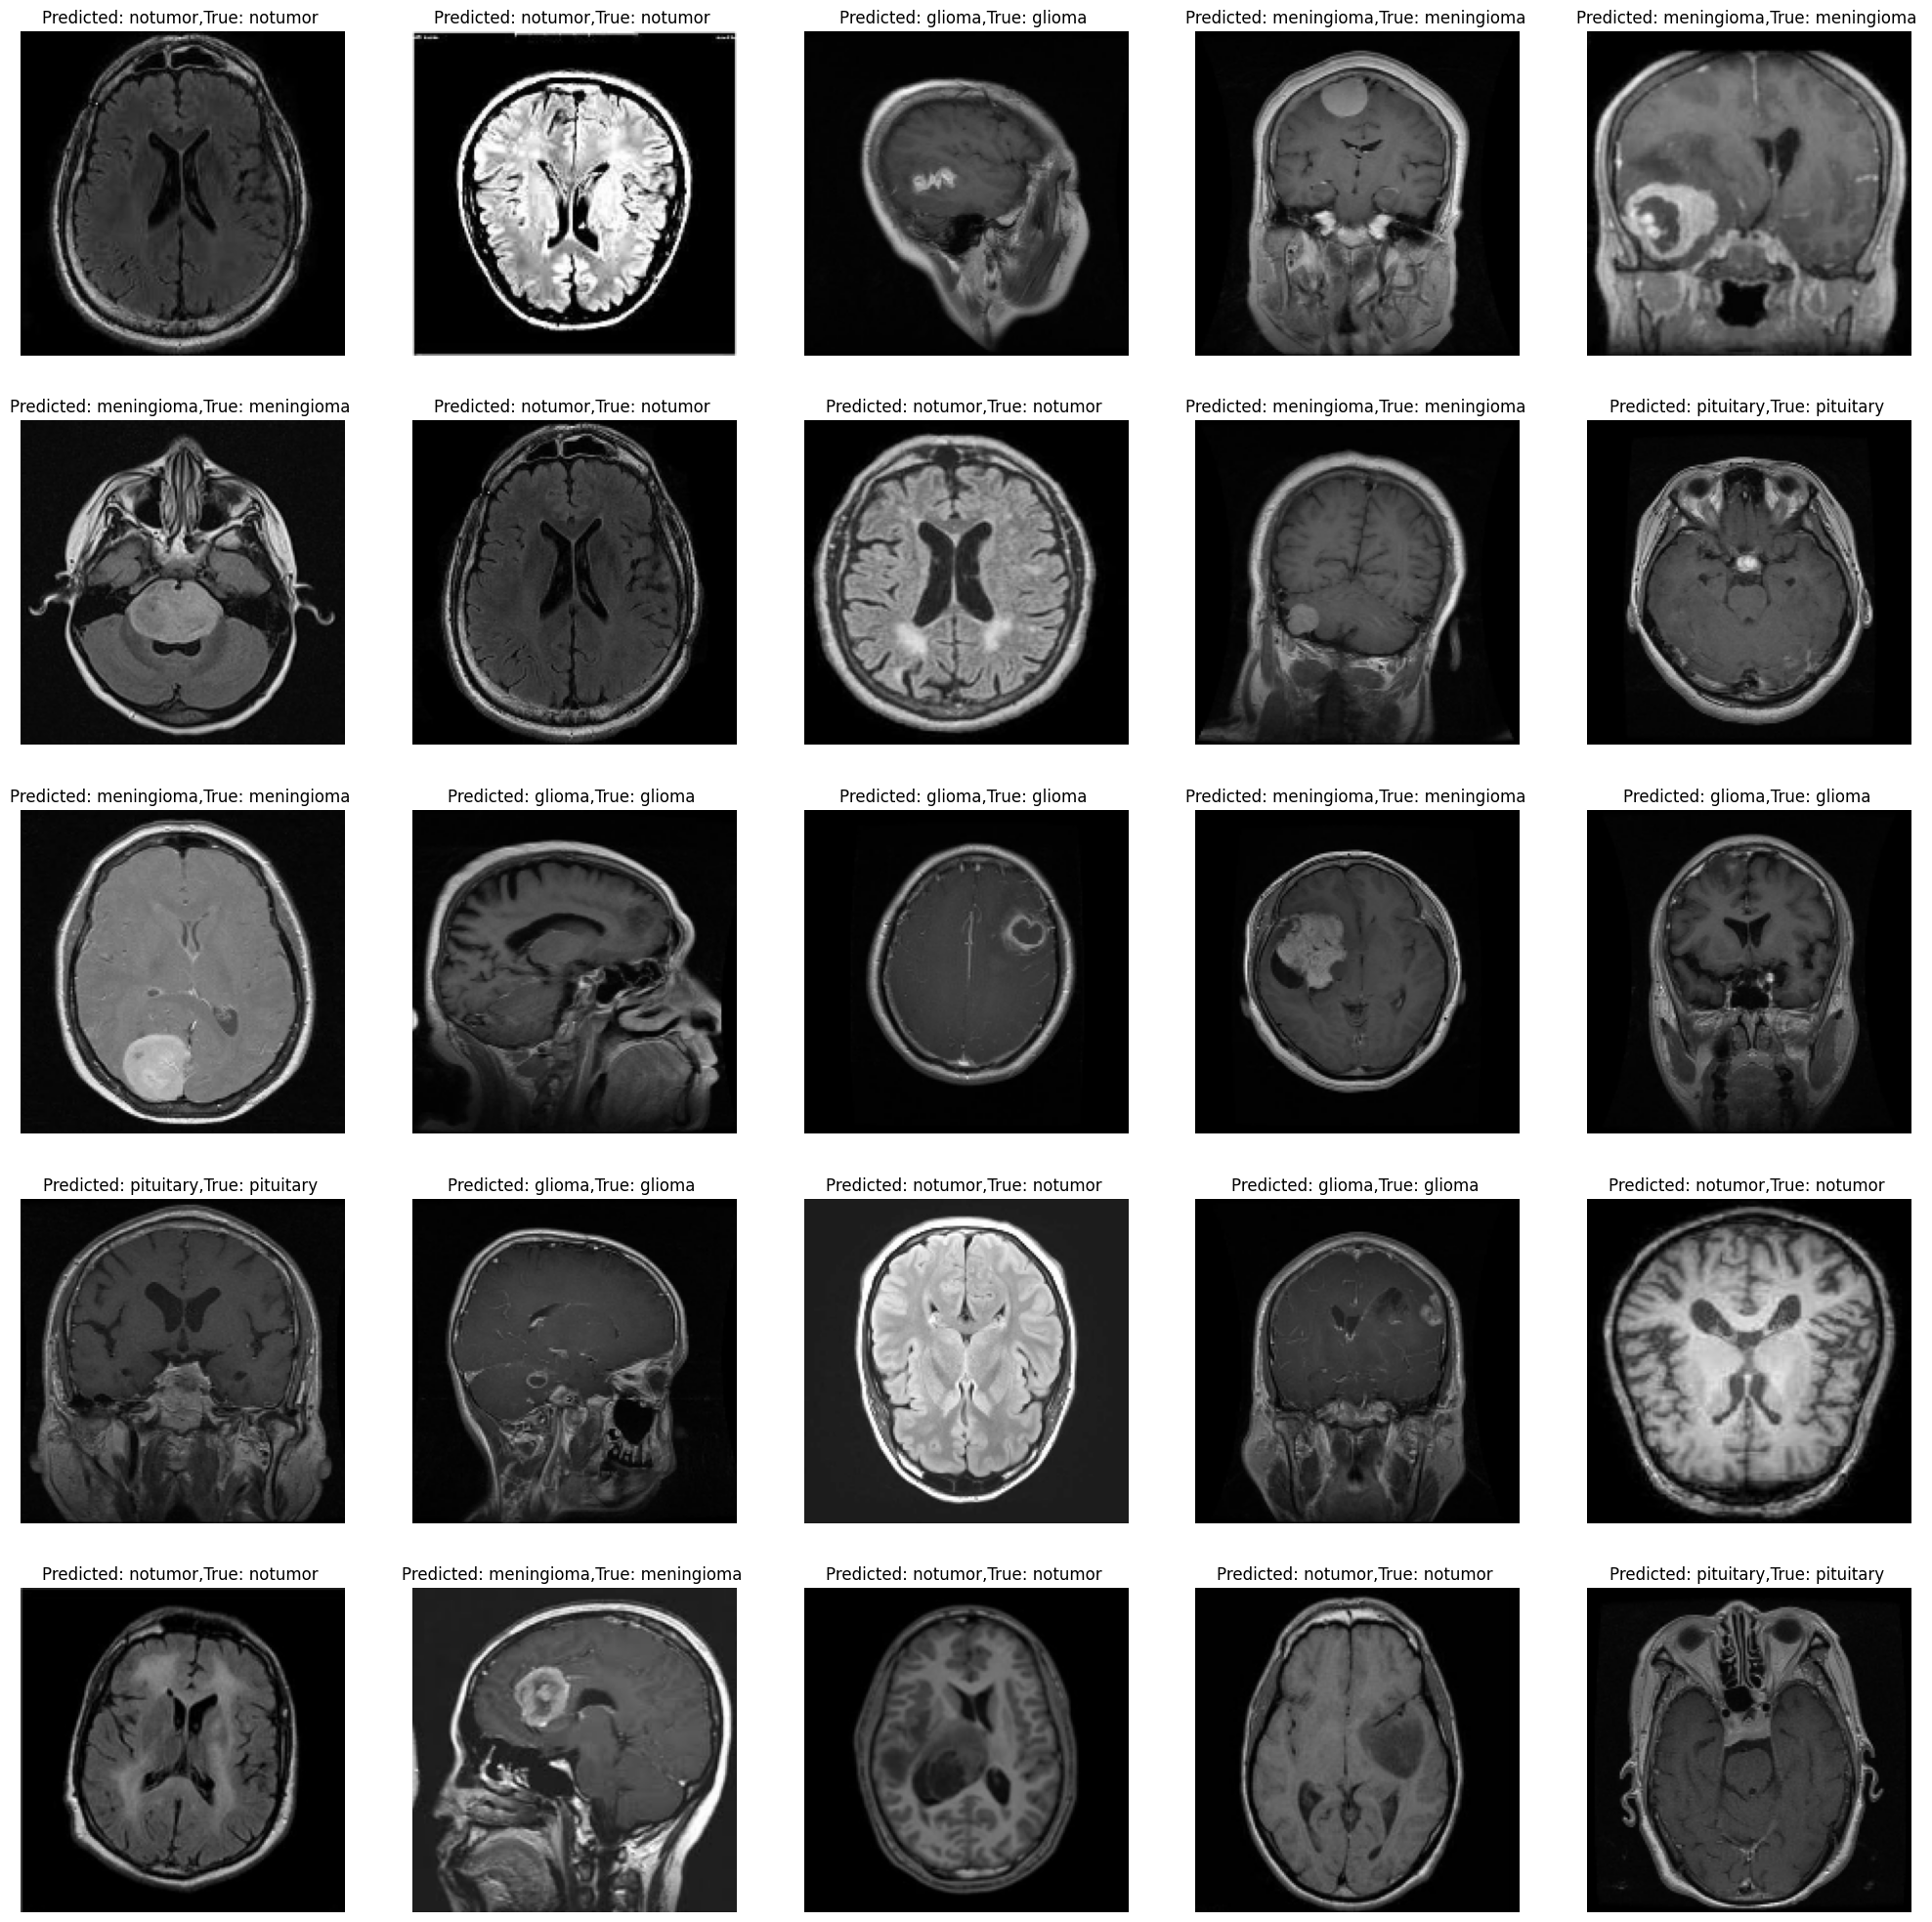

In [ ]:
plt.figure(figsize=(25,25))
for n , i in enumerate(list(np.random.randint(0,len(X_test),25))) :
    plt.subplot(5,5,n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f"Predicted: {getcode(np.argmax(y_pred[i]))},True: {getcode(y_test[i])} ")